<a href="https://colab.research.google.com/github/anirbrhm/Deep-Learning/blob/main/PyTorchCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch 
import matplotlib.pyplot as plt 
import numpy as np 

## Data Loading 

In [2]:
import torchvision
import torchvision.transforms as transforms
trainset = torchvision.datasets.CIFAR10(root = "./data", train = True, download = True,transform=transforms.ToTensor())

Extracting ./data/cifar-10-python.tar.gz to ./data


In [3]:
classes = ("plane", "car", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck") 

In [4]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True) # gives me 4 images everytime, shuffle means randomly. 

In [5]:
dataiter = iter(trainloader) # create an iterator 
images, labels = dataiter.next() # gives me one instance of trainloader (4 images) 

print(images.shape) 

print(images[0].shape)
print(labels[0].item())

torch.Size([4, 3, 32, 32])
torch.Size([3, 32, 32])
9


## Visualize Data

In [6]:
img = images[0]
print(type(img))

<class 'torch.Tensor'>


In [7]:
npimg = img.numpy()
print(npimg.shape) # in the shape of (z,x,y) , but to plot it we need (x,y,z) 

(3, 32, 32)


In [8]:
npimg = np.transpose(npimg, (1,2,0)) # for higher dimension matrices , transpose is any permutation. 
print(npimg.shape)

(32, 32, 3)


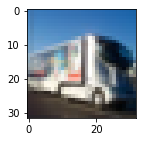

In [9]:
plt.figure(figsize=(2,2))
plt.imshow(npimg) # image plotting on matplotlib
plt.show()

Making a function of these steps

In [10]:
def imshow(img):
  npimg = img.numpy()
  plt.imshow(np.transpose(npimg,(1,2,0)))
  plt.show()

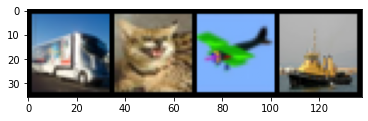

truck cat plane ship


In [11]:
imshow(torchvision.utils.make_grid(images))
print(" ".join(classes[labels[j]] for j in range(4)))

## Convolutional Layer

In [12]:
import torch.nn as nn 

class FirstCNN(nn.Module):
  def __init__(self):
    super(FirstCNN,self).__init__()
    self.conv1 = nn.Conv2d(3, 16, 3, padding=(1,1), stride = (2,2)) # padding = (1,1) , stride = (2,2) ; 3 = number of channels in each image , 
    # 16 = no. of different kernels , 3 = kernel size of 3x3 

  def forward(self,x):
    x = self.conv1(x) 
    return x 

In [13]:
net = FirstCNN()

In [14]:
out = net(images) 
out.shape

torch.Size([4, 16, 16, 16])

In [15]:
for param in net.parameters():
  print(param.shape) # 16 kernels , channel size 3 (input) , 3 , 3 correspoding to the weights 
  # each kernel has 1 bias term ,  hence 16 biases  

torch.Size([16, 3, 3, 3])
torch.Size([16])


In [16]:
out1 = out[0, 0, :, :].detach().numpy()
print(out1.shape)

(16, 16)


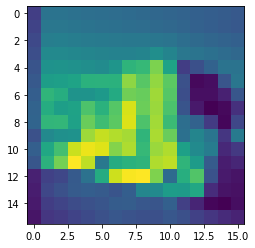

In [17]:
plt.imshow(out1)
plt.show()

## Deep Convolutional Network

In [18]:
class FirstCNN_v2 (nn.Module):
  def __init__(self):
    super(FirstCNN_v2,self).__init__()
    self.model = nn.Sequential(
        nn.Conv2d(3,8,3), # input = (N,3,32,32) , output = (N,8,30,30) , N is the batch size 
        nn.Conv2d(8,16,3)  # input = (N,8,30,30) , output = (N,16,28,28)
    )

  def forward(self,x):
    x = self.model(x) 
    return x

In [19]:
net = FirstCNN_v2()
out = net(images) 
out.shape

torch.Size([4, 16, 28, 28])

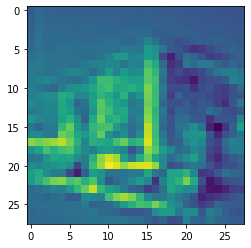

In [20]:
plt.imshow(out[0, 0, :, :].detach().numpy())

In [21]:
class FirstCNN_v3 (nn.Module):
  def __init__(self):
    super(FirstCNN_v3,self).__init__()
    self.model = nn.Sequential(
        nn.Conv2d(3,6,5),  # (N,3,32,32) -> (N,6,28,28) 
        nn.AvgPool2d(2, stride = 2), # (N,6,28,28) -> (N,6,14,14) 
        nn.Conv2d(6,16,5), # (N,6,14,14) -> (N,16,10,10)
        nn.AvgPool2d(2, stride = 2)  # (N,16,10,10) -> (N,16,5,5) 
    )

  def forward(self,x):
    x = self.model(x) 
    return x

In [22]:
net = FirstCNN_v3()
out = net(images) 
out.shape

torch.Size([4, 16, 5, 5])

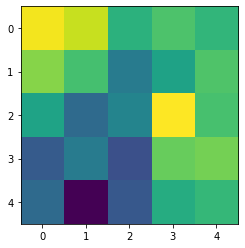

In [23]:
plt.imshow(out[0, 0, :, :].detach().numpy())

## LeNet

In [24]:
class LeNet(nn.Module) : 
  def __init__(self):
    super(LeNet,self).__init__()
    self.cnn_model = nn.Sequential(
        nn.Conv2d(3,6,5), # (N,3,32,32) -> (N,6,28,28) 
        nn.Tanh(), # (N,6,28,28) -> (N,6,28,28) 
        nn.AvgPool2d(2, stride = 2), # (N,6,28,28) -> (N,6,14,14)
        nn.Conv2d(6,16,5), # (N,6,14,14) -> (N,16,10,10) 
        nn.Tanh(), # (N,16,10,10) -> (N,16,10,10) 
        nn.AvgPool2d(2, stride = 2) # (N,16,10,10) -> (N,16,5,5) 
    ) 
    # we flatten the tensor here to be a 400 dimensional vector 

    self.fc_model = nn.Sequential(
        nn.Linear(400,120), # (N, 400) -> (N, 120) 
        nn.Tanh(), 
        nn.Linear(120,84), # (N, 120) -> (N, 84)
        nn.Tanh(), 
        nn.Linear(84,10) # (N, 84) -> (N, 10) 
        # not having softmax here because max of these will still be the max of softmax, and the gradient part can be handled by the cross entropy loss, which itself goes through a softmax. 
    )

  def forward(self,x):
    print(x.shape) 
    x = self.cnn_model(x) 
    print(x.shape) 
    x = x.view(x.size(0),-1)
    print(x.shape) 
    x = self.fc_model(x) 
    print(x.shape)
    return x 

In [25]:
net = LeNet()
out = net(images)

torch.Size([4, 3, 32, 32])
torch.Size([4, 16, 5, 5])
torch.Size([4, 400])
torch.Size([4, 10])


In [26]:
print(out)

tensor([[-0.1090, -0.0113,  0.0775, -0.0883,  0.1467,  0.0086,  0.0505, -0.0111,
         -0.0344,  0.1266],
        [-0.1043, -0.0290,  0.0862, -0.1008,  0.1438,  0.0109,  0.0443, -0.0162,
         -0.0360,  0.1282],
        [-0.1048, -0.0296,  0.0979, -0.1228,  0.1268,  0.0250,  0.0281, -0.0045,
         -0.0545,  0.1344],
        [-0.1074, -0.0256,  0.0837, -0.1127,  0.1390,  0.0355,  0.0573, -0.0196,
         -0.0421,  0.1115]], grad_fn=<AddmmBackward>)


In [27]:
max_values, pred_class = torch.max(out.data,1) 
print(pred_class)

tensor([4, 4, 9, 4])


## Training LeNet 

In [28]:
class LeNet(nn.Module) : 
  def __init__(self):
    super(LeNet,self).__init__()
    self.cnn_model = nn.Sequential(
        nn.Conv2d(3,6,5), # (N,3,32,32) -> (N,6,28,28) 
        nn.Tanh(), # (N,6,28,28) -> (N,6,28,28) 
        nn.AvgPool2d(2, stride = 2), # (N,6,28,28) -> (N,6,14,14)
        nn.Conv2d(6,16,5), # (N,6,14,14) -> (N,16,10,10) 
        nn.Tanh(), # (N,16,10,10) -> (N,16,10,10) 
        nn.AvgPool2d(2, stride = 2) # (N,16,10,10) -> (N,16,5,5) 
    ) 
    # we flatten the tensor here to be a 400 dimensional vector 

    self.fc_model = nn.Sequential(
        nn.Linear(400,120), # (N, 400) -> (N, 120) 
        nn.Tanh(), 
        nn.Linear(120,84), # (N, 120) -> (N, 84)
        nn.Tanh(), 
        nn.Linear(84,10) # (N, 84) -> (N, 10) 
        # not having softmax here because max of these will still be the max of softmax, and the gradient part can be handled by the cross entropy loss, which itself goes through a softmax. 
    )

  def forward(self,x):
    # print(x.shape) 
    x = self.cnn_model(x) 
    # print(x.shape) 
    x = x.view(x.size(0),-1)
    # print(x.shape) 
    x = self.fc_model(x) 
    # print(x.shape)
    return x 

In [29]:
batch_size = 128 
trainset = torchvision.datasets.CIFAR10(root = "./data", train = True, download = True,transform=transforms.ToTensor())
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True)
testset = torchvision.datasets.CIFAR10(root = "./data", train = False, download = True,transform=transforms.ToTensor())
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False) # no need for shuffling  

Files already downloaded and verified
Files already downloaded and verified


In [30]:
def evaluation(dataloader):
  total , correct = 0 , 0 
  for data in dataloader:
    inputs, labels = data 
    outputs = net(inputs) 
    _, pred = torch.max(outputs.data, 1) 
    total += labels.size(0) 
    correct += (pred == labels).sum().item()
  return 100 * correct / total 

In [31]:
net = LeNet()

In [32]:
import torch.optim as optim 

loss_fn = nn.CrossEntropyLoss() # takes into consideration the softmax we have to go through 
opt = optim.Adam(net.parameters())

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 7.87 µs
Epoch : 0/16, Test acc : 37.65, Train acc : 37.92
Epoch : 1/16, Test acc : 42.49, Train acc : 42.67
Epoch : 2/16, Test acc : 45.40, Train acc : 46.01
Epoch : 3/16, Test acc : 47.97, Train acc : 48.98
Epoch : 4/16, Test acc : 49.44, Train acc : 51.34
Epoch : 5/16, Test acc : 50.77, Train acc : 53.23
Epoch : 6/16, Test acc : 52.19, Train acc : 55.40
Epoch : 7/16, Test acc : 53.14, Train acc : 56.72
Epoch : 8/16, Test acc : 53.01, Train acc : 57.57
Epoch : 9/16, Test acc : 53.19, Train acc : 58.01
Epoch : 10/16, Test acc : 53.44, Train acc : 59.11
Epoch : 11/16, Test acc : 54.55, Train acc : 61.57
Epoch : 12/16, Test acc : 55.01, Train acc : 62.00
Epoch : 13/16, Test acc : 54.91, Train acc : 63.06
Epoch : 14/16, Test acc : 55.15, Train acc : 63.91
Epoch : 15/16, Test acc : 55.32, Train acc : 64.79


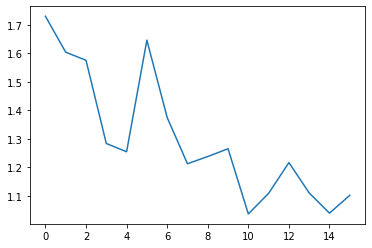

In [33]:
import time 

%time 
loss_arr = [] 
loss_epoch_arr = []
max_epochs = 16 

for epoch in range(max_epochs):
  for i, data in enumerate(trainloader, 0):
    inputs, labels = data 
    opt.zero_grad()

    outputs = net(inputs)
    loss = loss_fn(outputs, labels)
    loss.backward()
    opt.step()

    loss_arr.append(loss.item())

  loss_epoch_arr.append(loss.item())
  print("Epoch : %d/%d, Test acc : %0.2f, Train acc : %0.2f" %(epoch,max_epochs,evaluation(testloader),evaluation(trainloader)))

plt.plot(loss_epoch_arr)
plt.show() 

Overfitting

## Move to GPU 

In [35]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu") 
print(device)

cuda:0


In [36]:
def evaluation(dataloader):
  total , correct = 0 , 0 
  for data in dataloader:
    inputs, labels = data 
    inputs, labels = inputs.to(device), labels.to(device) 
    outputs = net(inputs) 
    _, pred = torch.max(outputs.data, 1) 
    total += labels.size(0) 
    correct += (pred == labels).sum().item()
  return 100 * correct / total 

In [52]:
net = LeNet().to(device)
loss_fn = nn.CrossEntropyLoss() 
opt = optim.Adam(net.parameters())

In [53]:
%time 

max_epochs = 16 

for epoch in range(max_epochs):
  for i, data in enumerate(trainloader, 0):
    inputs, labels = data 
    inputs, labels = inputs.to(device), labels.to(device)
    
    opt.zero_grad()

    outputs = net(inputs)
    loss = loss_fn(outputs, labels)
    loss.backward()
    opt.step()

  print("Epoch : %d/%d" %(epoch,max_epochs))

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.48 µs
Epoch : 0/16
Epoch : 1/16
Epoch : 2/16
Epoch : 3/16
Epoch : 4/16
Epoch : 5/16
Epoch : 6/16
Epoch : 7/16
Epoch : 8/16
Epoch : 9/16
Epoch : 10/16
Epoch : 11/16
Epoch : 12/16
Epoch : 13/16
Epoch : 14/16
Epoch : 15/16


In [54]:
print("Test acc : %0.2f, Train acc : %0.2f" %(evaluation(testloader),evaluation(trainloader)))

Test acc : 54.80, Train acc : 64.62


## Basic Visualization 

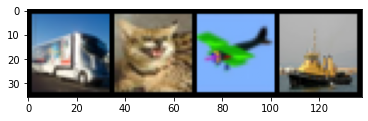

In [40]:
imshow(torchvision.utils.make_grid(images))

In [41]:
net = net.to("cpu")

In [42]:
out = net(images) # gives us the final output 
print(out.shape) 

torch.Size([4, 10])


In [43]:
# to access the ouput of the first layer in our sequential 
out = net.cnn_model[0](images) 
out.shape

torch.Size([4, 6, 28, 28])

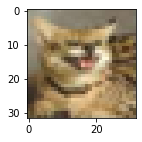

In [44]:
image_id = 1 
plt.figure(figsize = (2,2)) 
imshow(images[image_id])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.


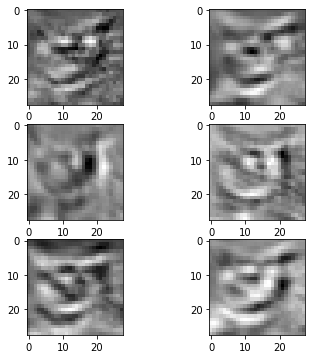

In [45]:
plt.figure(figsize = (6,6)) 
plt.subplot(321) 
for i in range (6) : 
  ax1 = plt.subplot(3,2,i+1) 
  plt.imshow(out[image_id,i,:,:].detach().numpy(), cmap = "binary")
plt.show()